## Task 1: Import Modules and Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

2024-08-21 01:31:06.044700: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 01:31:07.286844: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 01:31:07.289911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-21 01:31:10.115163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Task 2: Load the Dataset

In [2]:
tf_dataset = tf.keras.preprocessing.image_dataset_from_directory("/usercode/Roadsign_dataset", 
    seed = 41, 
    shuffle = True,
    image_size = (256,256),
    batch_size = 32)

Found 1505 files belonging to 7 classes.


## Task 3: Get the Names and Numbers of Classes

In [3]:
class_names = tf_dataset.class_names
num_names = len(class_names)

print(class_names)
print(num_names)

['No-Left_turn', 'crossway', 'no-entry', 'no-parking', 'no_u-turn', 'nohornzone', 'stop']
7


## Task 4: Visualize the Dataset

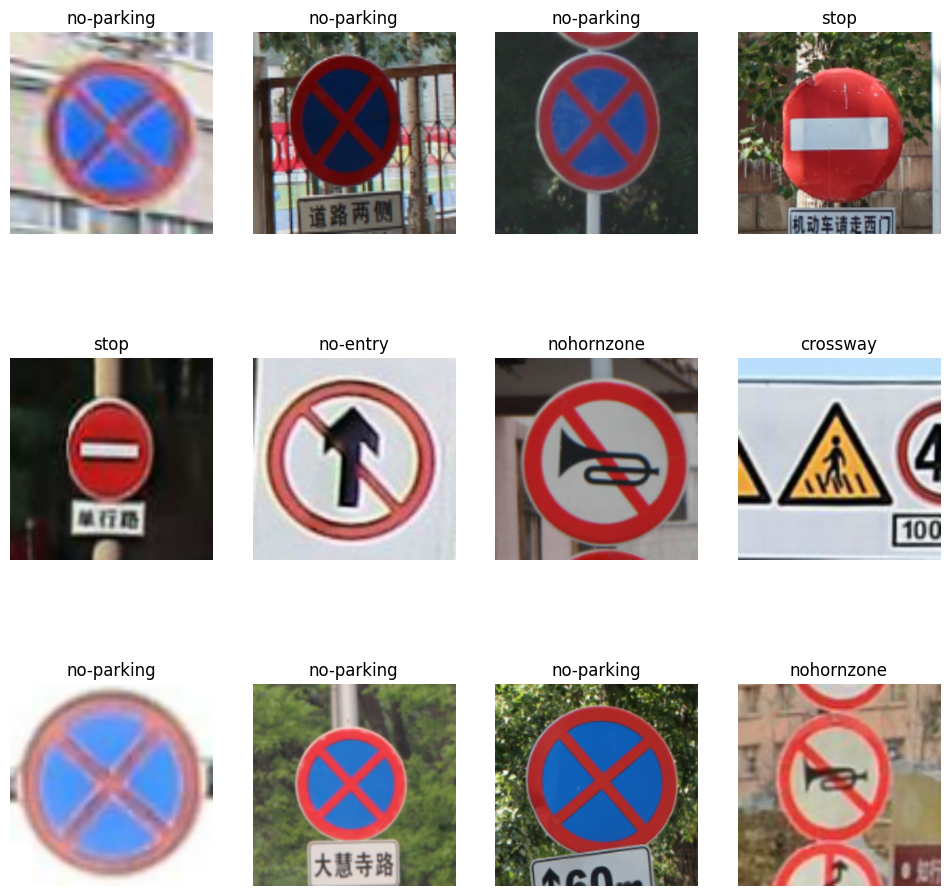

In [4]:
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in tf_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


    

## Task 5: Split the Dataset

In [5]:
def tf_split_data(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    assert (train_split + test_split + val_split) == 1  # Ensure the splits sum to 1

    ds_size = len(ds)  # Get the total size of the dataset

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=10)  # Shuffle the dataset if required

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_set = ds.take(train_size)  # Get the training set
    val_set = ds.skip(train_size).take(val_size)  # Get the validation set
    test_set = ds.skip(train_size).skip(val_size)  # Get the test set

    return train_set, val_set, test_set  # Return the three datasets

train_ds, val_ds, test_ds = tf_split_data(tf_dataset)  # Apply the function to split the dataset


## Task 6: Declare Constants

In [6]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCH = 3

## Task 7: Shuffling Data and Prefetching

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Task 8: Resizing and Rescaling Layer

In [8]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

## Task 9: Data Augmentation

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

## Task 10: Implementing Data Augmentation

In [10]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x,training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

## Task 11: Define the Parameters for Model Building

In [11]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

## Task 12: Architecturing Convolution Neural Network

In [12]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

## Task 13: Model Compilation

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Task 14: Train the Model

In [15]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCH,
)

Epoch 1/3


2024-08-21 01:32:57.113682: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.
2024-08-21 01:33:00.347364: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


 1/38 [..............................] - ETA: 6:44 - loss: 1.9369 - accuracy: 0.4375

2024-08-21 01:33:01.628829: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.
2024-08-21 01:33:04.180090: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


 2/38 [>.............................] - ETA: 2:25 - loss: 1.9241 - accuracy: 0.3906

2024-08-21 01:33:05.675610: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


38/38 [==============================] - 169s 4s/step - loss: 1.3924 - accuracy: 0.4375 - val_loss: 1.1530 - val_accuracy: 0.5859
Epoch 2/3
38/38 [==============================] - 160s 4s/step - loss: 0.8012 - accuracy: 0.7130 - val_loss: 0.7941 - val_accuracy: 0.7109
Epoch 3/3
38/38 [==============================] - 160s 4s/step - loss: 0.6106 - accuracy: 0.7533 - val_loss: 0.4001 - val_accuracy: 0.8125


## Task 15: Evaluate the Model

In [16]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 9s 1s/step - loss: 0.5007 - accuracy: 0.7396


## Task 16: Defining Training and Validation Metrics

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

## Task 17: Plotting Accuracy and Loss Curves

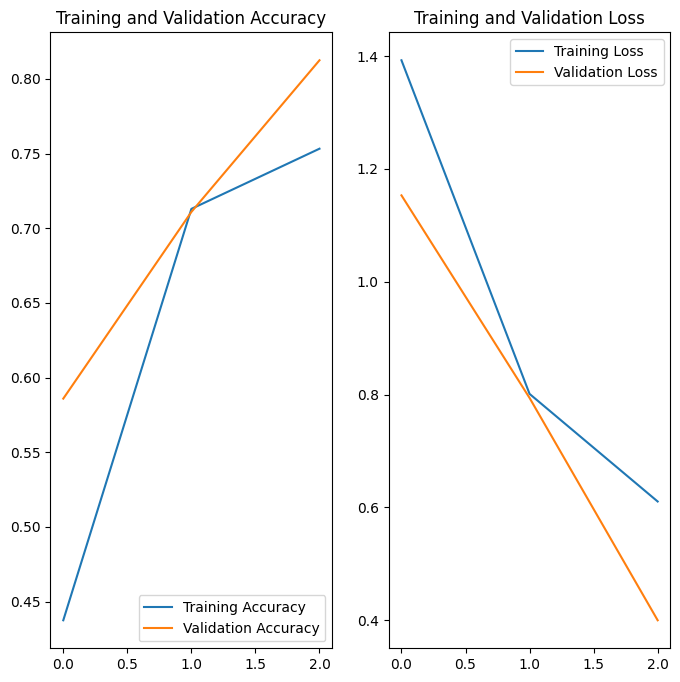

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Task 18: Predict function

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


## Task 19: Test the Model on a Single Image

first image to predict
actual label: crossway
1/1 [==============================] - 1s 1s/step
predicted label: crossway


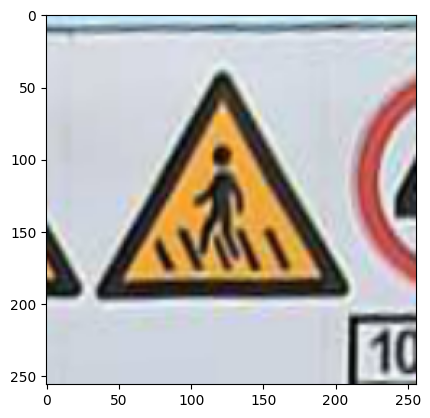

In [22]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

## Task 20: Test the Model on Multiple Images

1/1 [==============================] - 0s 44ms/step


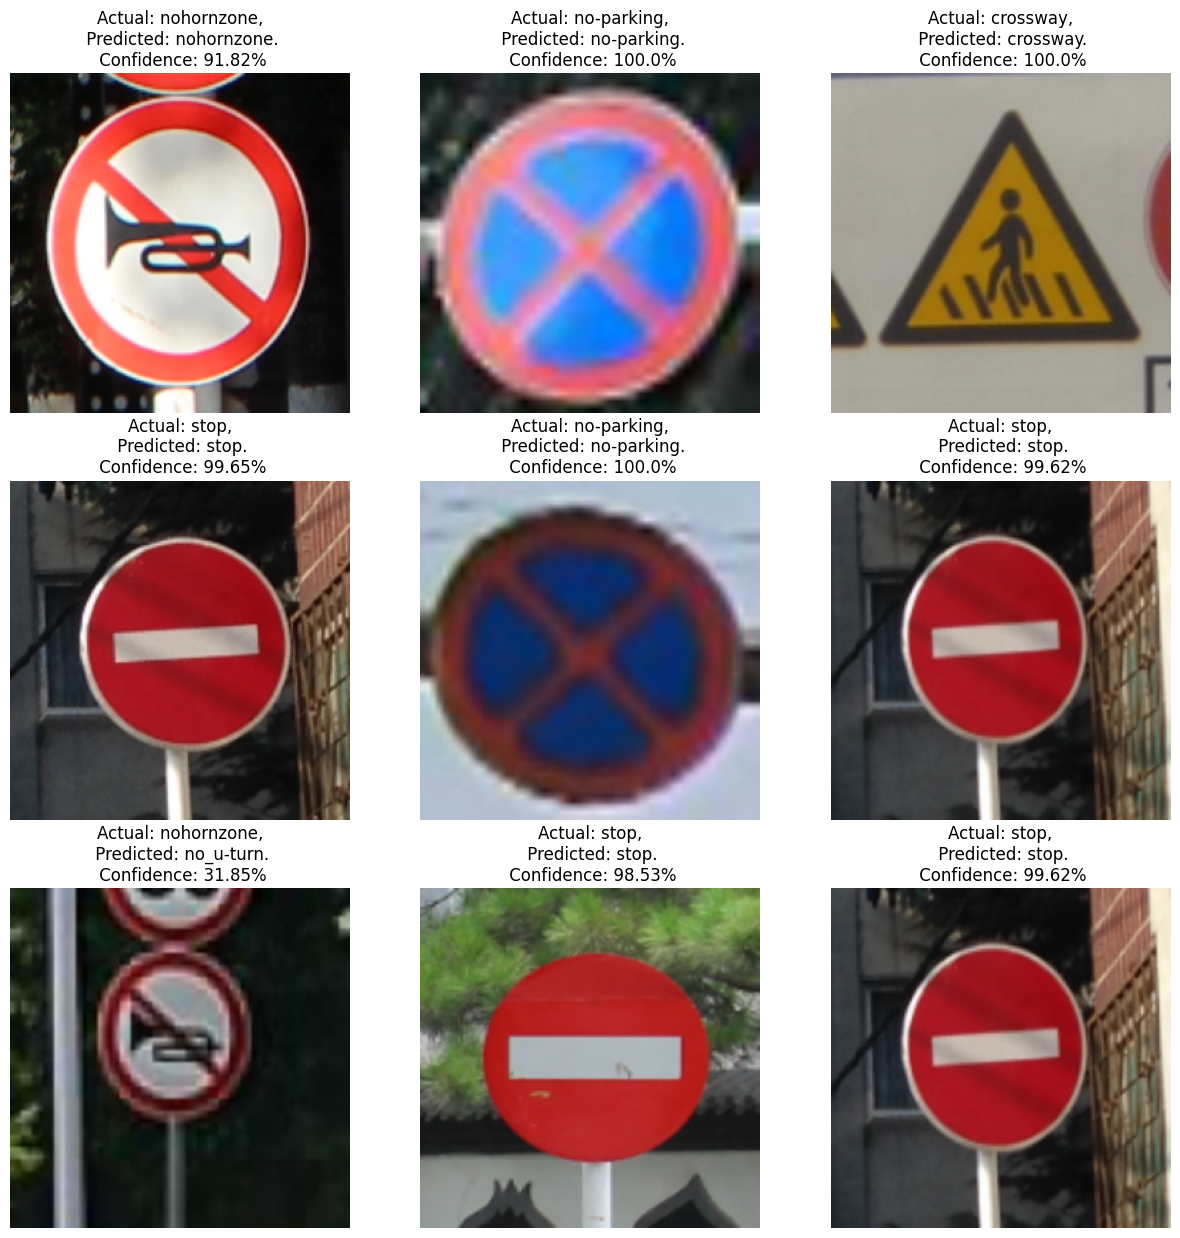

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")